In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
# loads the dataset
Shipment= pd.read_csv("C:/Users/i-net computer/OneDrive/Desktop/Data Science project 2/Dataset/shipments.csv")
Shipment

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
#making a copy of the original data
Shipment1 = Shipment.copy()
Shipment1 

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
#Finding duplicate rows and removing them
Shipment1[Shipment1.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [5]:
Shipment2= Shipment1.drop_duplicates().reset_index(drop=True)
Shipment2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [6]:
Shipment2.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
Shipment2['Cost_of_the_Product'].value_counts()

245    110
257    109
260    106
254    101
243    100
      ... 
107      5
99       5
120      5
96       5
122      4
Name: Cost_of_the_Product, Length: 215, dtype: int64

In [8]:
Shipment2['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [9]:
Shipment2['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

In [10]:
Shipment2.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Shipment2['Warehouse_block']= label_encoder.fit_transform(Shipment2['Warehouse_block']) 
Shipment2['Mode_of_Shipment']= label_encoder.fit_transform(Shipment2['Mode_of_Shipment']) 
Shipment2['Product_importance']= label_encoder.fit_transform(Shipment2['Product_importance']) 
Shipment2['Gender']= label_encoder.fit_transform(Shipment2['Gender'])
Shipment2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


<h1>Data Visualization<h1>

C:\Users\i-net computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_rating', ylabel='count'>

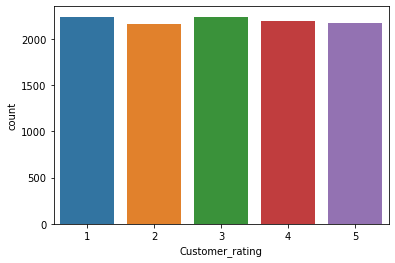

In [12]:
sns.countplot(Shipment2['Customer_rating'])

C:\Users\i-net computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


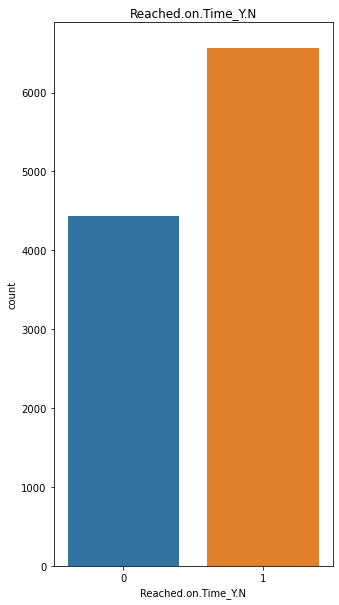

In [13]:
plt.figure(figsize=[5,10])
sns.countplot(Shipment2['Reached.on.Time_Y.N'])
plt.title('Reached.on.Time_Y.N')
plt.show()


C:\Users\i-net computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


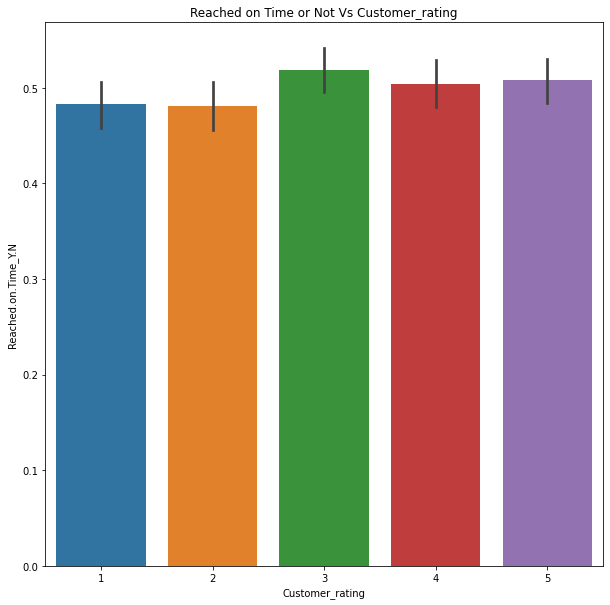

In [55]:
plt.figure(figsize=[10,10])
sns.barplot(Shipment2['Customer_rating'],Shipment2['Reached.on.Time_Y.N'])
plt.title('Reached on Time or Not Vs Customer_rating')
plt.show()

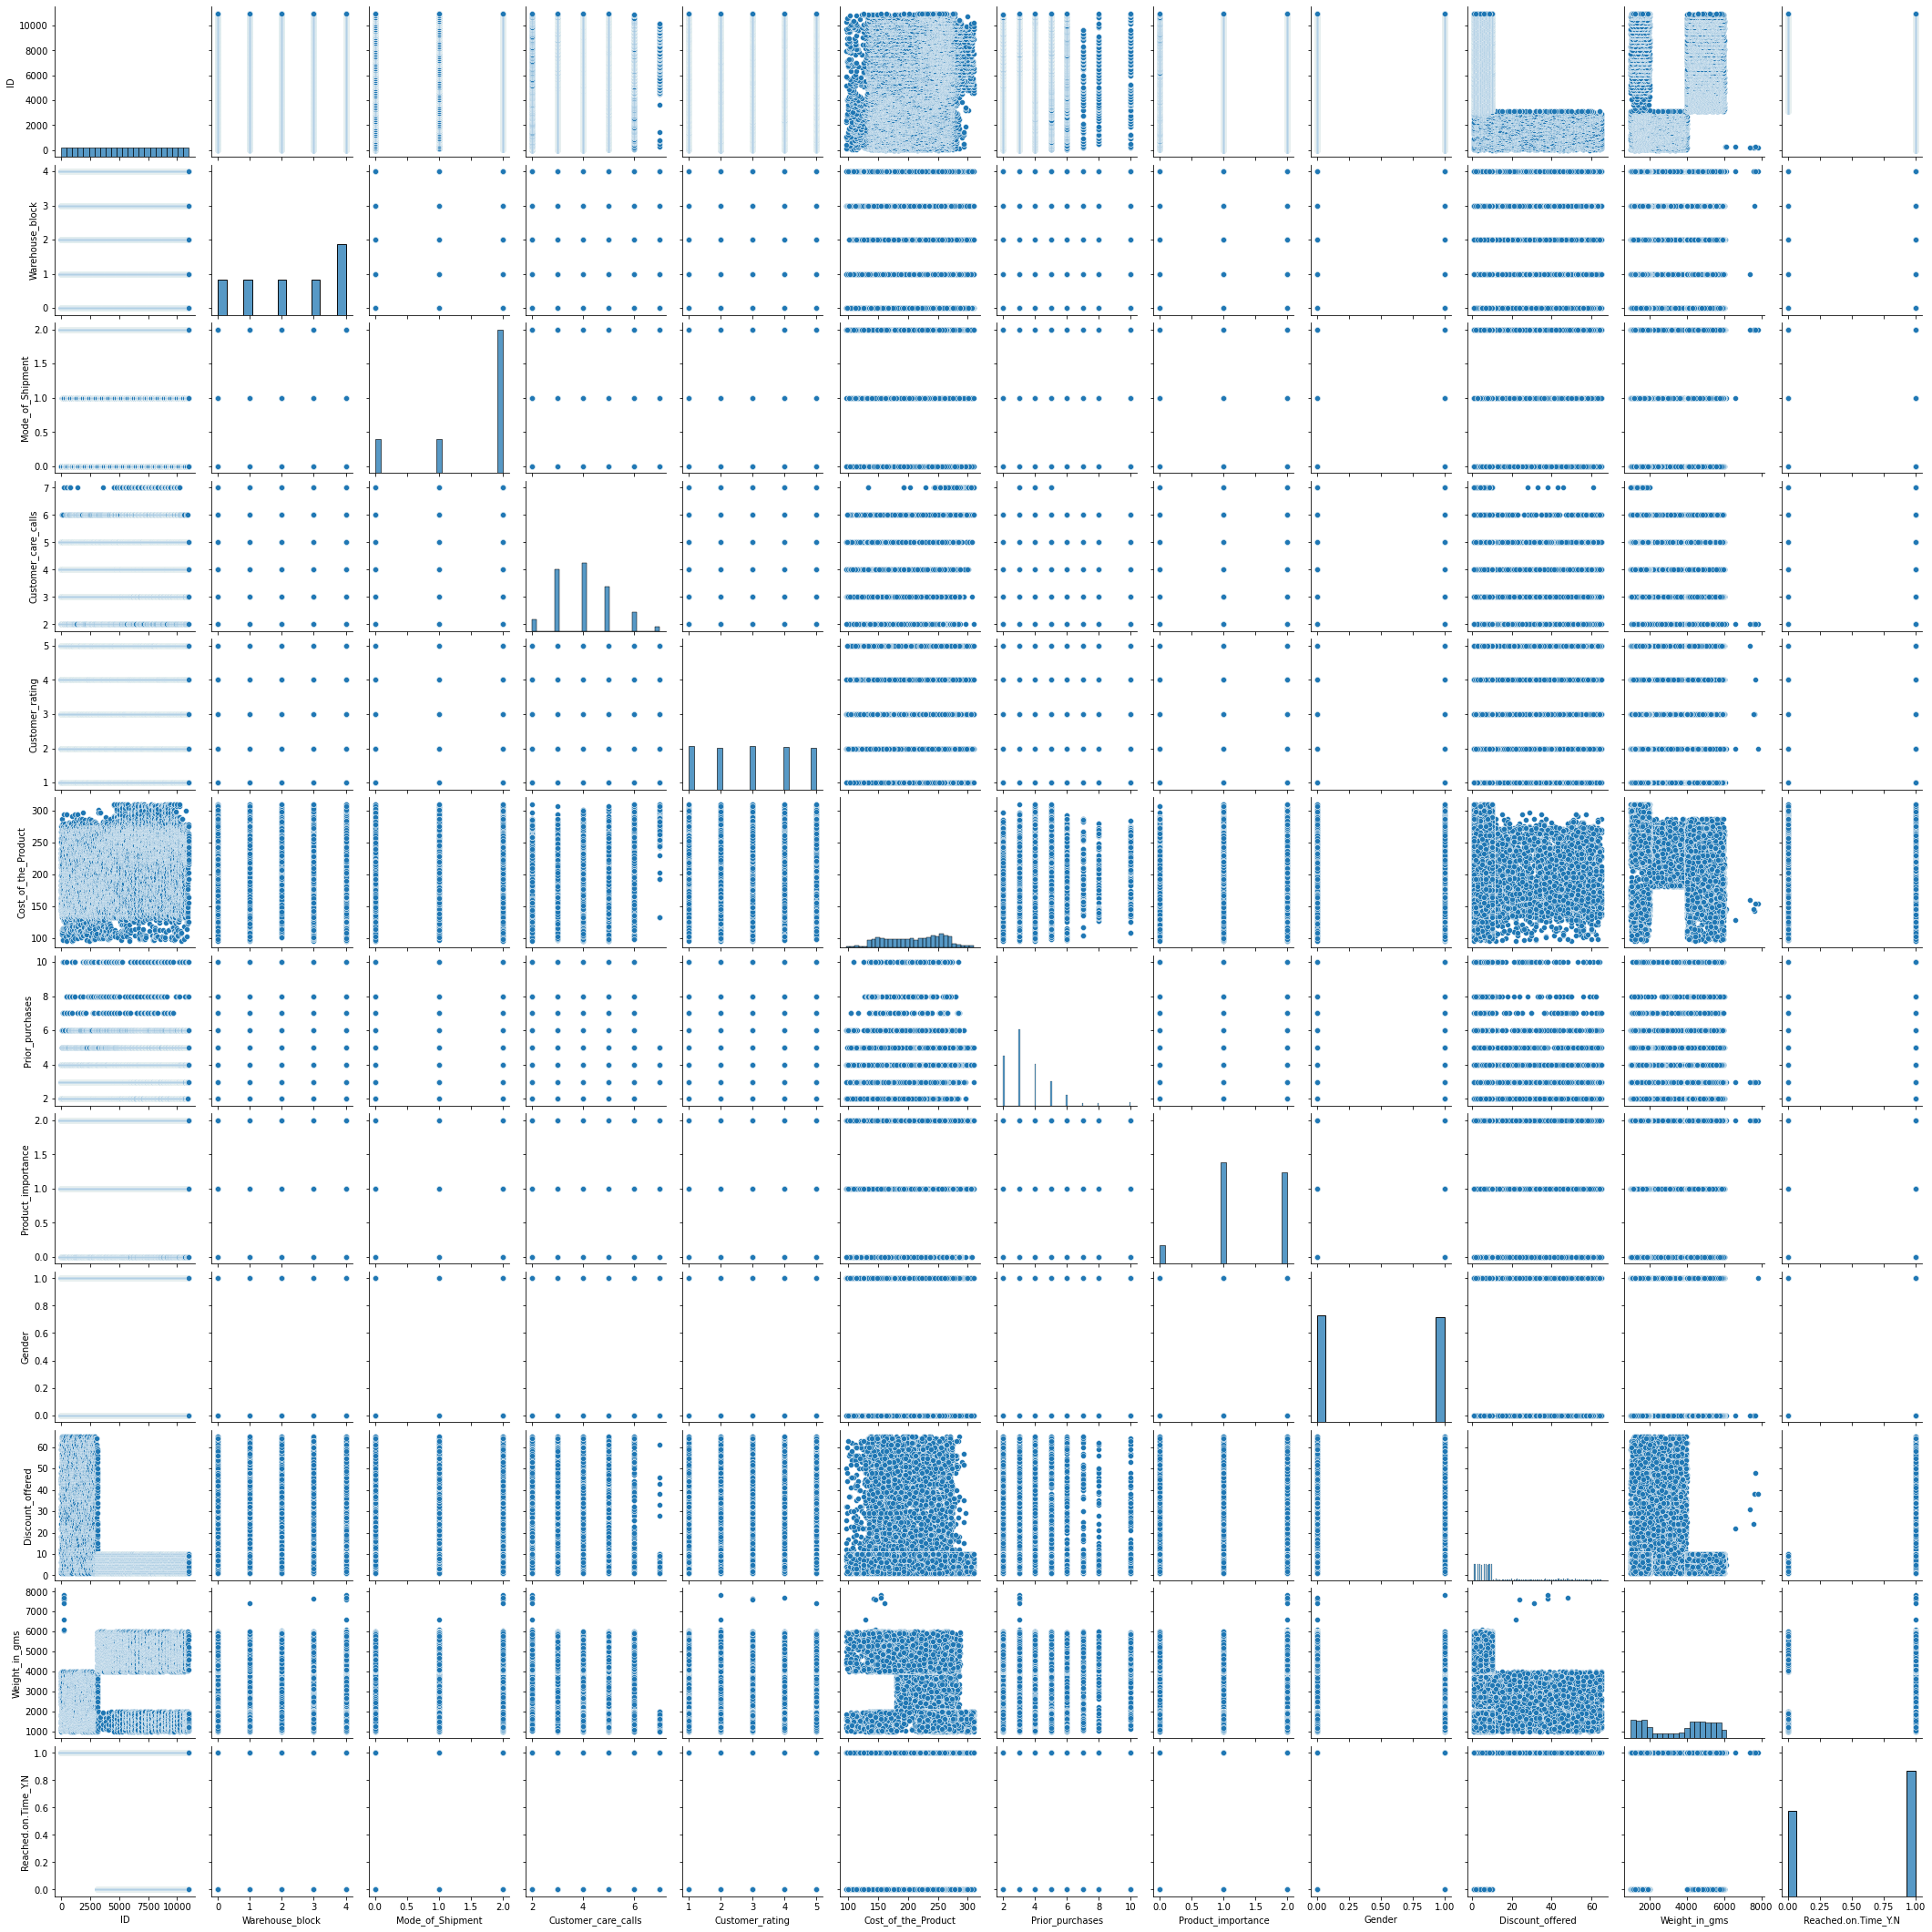

In [14]:
sns.pairplot(Shipment2)
plt.show()

In [15]:
#outlier detection for numerical data
num_columns = Shipment2.select_dtypes(exclude='object').columns.tolist()

<ipython-input-16-aab9377cfb6c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8,4,i)
<ipython-input-16-aab9377cfb6c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8,4,i)


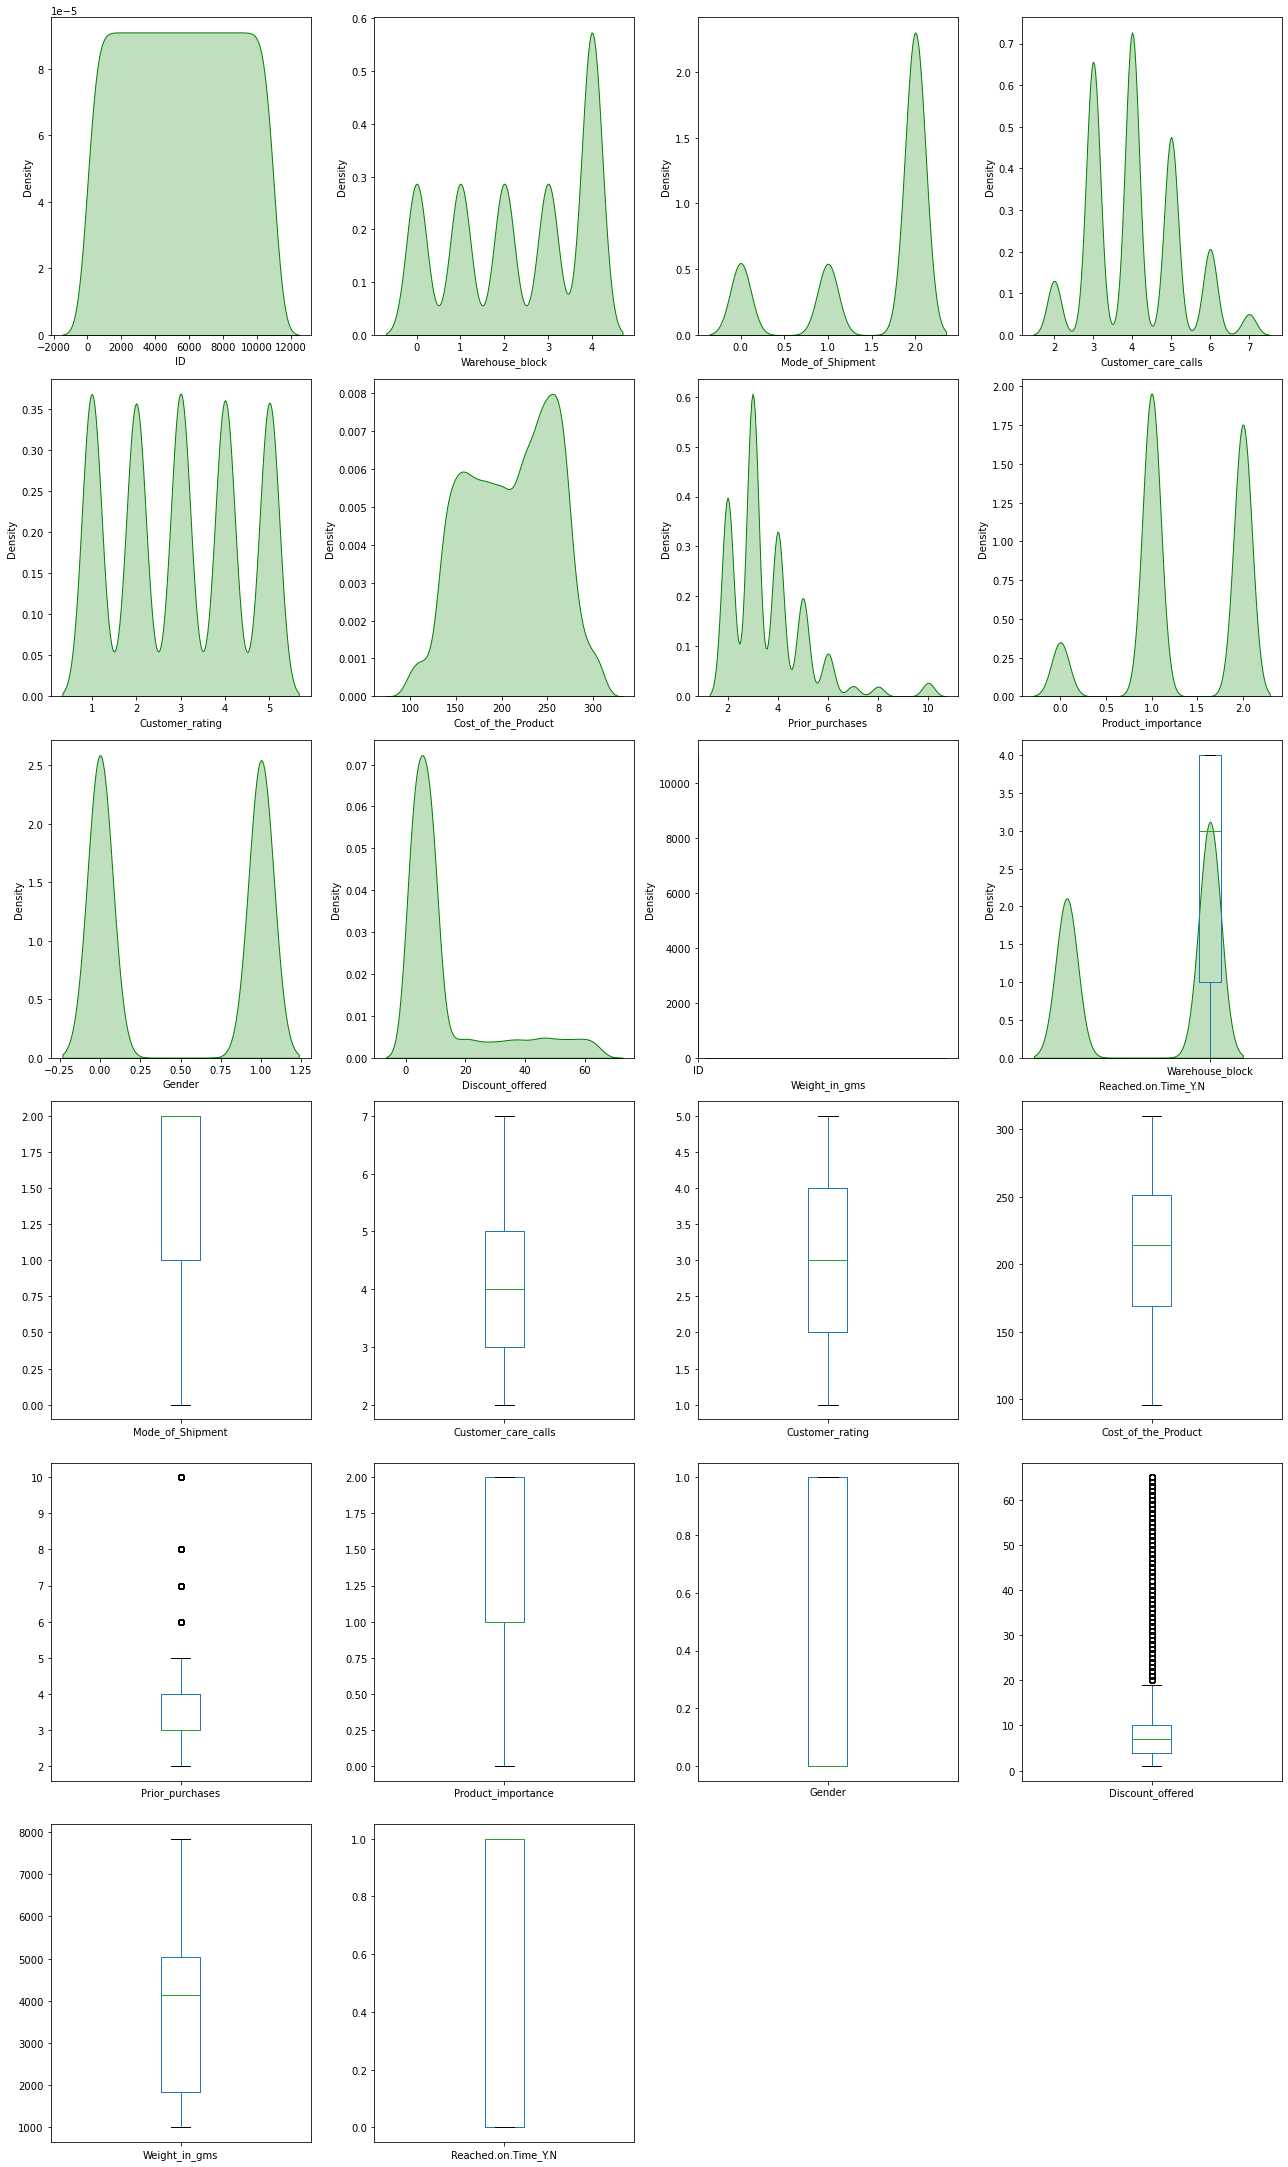

In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(Shipment2[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    Shipment2[col].plot.box()
plt.tight_layout() 
plt.show()
 

In [17]:
Shipment2.drop(Shipment2[(Shipment2['Prior_purchases']>5)].index,inplace=True)
Shipment2.drop(Shipment2[(Shipment2['Discount_offered']>20)].index,inplace=True)

In [18]:
Shipment2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,1,0,3,3,176,4,2,1,10,1177,1
5,6,4,0,3,1,162,3,2,0,12,1417,1
6,7,3,0,3,4,250,3,1,0,3,2371,1
8,9,0,0,3,4,150,3,1,0,11,1861,1
10,11,2,0,3,4,189,2,2,1,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,3,2,5,1,236,5,2,1,3,1906,0
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0


In [19]:
#Descriptive stat
Shipment2['Reached.on.Time_Y.N'].describe()

count    8028.000000
mean        0.498754
std         0.500030
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [20]:
#Descriptive stat
Shipment2['Cost_of_the_Product'].describe()

count    8028.000000
mean      213.480942
std        48.227065
min        96.000000
25%       173.000000
50%       219.000000
75%       254.000000
max       310.000000
Name: Cost_of_the_Product, dtype: float64

In [21]:
Shipment2['Customer_rating'].describe()

count    8028.000000
mean        2.996014
std         1.413239
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Customer_rating, dtype: float64

In [22]:
Shipment2['Prior_purchases'].describe()

count    8028.000000
mean        3.280394
std         0.990413
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Prior_purchases, dtype: float64

In [23]:
Shipment2['Discount_offered'].describe()

count    8028.000000
mean        6.086447
std         3.725708
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        20.000000
Name: Discount_offered, dtype: float64

In [24]:
Shipment2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 3 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   8028 non-null   int64
 1   Warehouse_block      8028 non-null   int32
 2   Mode_of_Shipment     8028 non-null   int32
 3   Customer_care_calls  8028 non-null   int64
 4   Customer_rating      8028 non-null   int64
 5   Cost_of_the_Product  8028 non-null   int64
 6   Prior_purchases      8028 non-null   int64
 7   Product_importance   8028 non-null   int32
 8   Gender               8028 non-null   int32
 9   Discount_offered     8028 non-null   int64
 10  Weight_in_gms        8028 non-null   int64
 11  Reached.on.Time_Y.N  8028 non-null   int64
dtypes: int32(4), int64(8)
memory usage: 689.9 KB


In [25]:
#check for missing values
Shipment2.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [26]:
import seaborn as sns
cols = Shipment2.columns 
cols

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [27]:
min_val_price = Shipment2["Reached.on.Time_Y.N"]. min()
min_val_price

0

In [28]:
max_val_price = Shipment2["Reached.on.Time_Y.N"]. max()
max_val_price

1

In [29]:
min_val_price = Shipment2["Cost_of_the_Product"]. min()
min_val_price

96

In [30]:
max_val_price = Shipment2["Cost_of_the_Product"]. max()
max_val_price

310

In [31]:
min_val_price = Shipment2["Customer_rating"]. min()
min_val_price

1

In [32]:
max_val_price = Shipment2["Customer_rating"]. max()
max_val_price

5

In [33]:
min_val_price = Shipment2["Prior_purchases"]. min()
min_val_price

2

In [34]:
max_val_price = Shipment2["Prior_purchases"]. max()
max_val_price

5

In [35]:
min_val_price = Shipment2["Discount_offered"]. min()
min_val_price

1

In [36]:
max_val_price = Shipment2["Discount_offered"]. max()
max_val_price

20

In [37]:
#correlation analysis
Shipment2.corr()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.002361,0.000496,0.148908,-0.010711,0.156422,0.211854,0.028417,-0.014462,-0.252297,0.084088,-0.234997
Warehouse_block,0.002361,1.000000,-0.001320,0.017604,0.013784,-0.011757,-0.007382,-0.004299,-0.007535,-0.000895,0.010032,0.001209
Mode_of_Shipment,0.000496,-0.001320,1.000000,-0.014173,0.000280,0.014873,-0.015529,0.004452,-0.013688,-0.001366,0.001087,-0.006669
Customer_care_calls,0.148908,0.017604,-0.014173,1.000000,0.014179,0.368928,0.349787,-0.001532,-0.005723,-0.044838,-0.418619,-0.017511
Customer_rating,-0.010711,0.013784,0.000280,0.014179,1.000000,0.010907,0.002312,-0.007826,0.002810,0.002148,-0.004788,0.020443
Cost_of_the_Product,0.156422,-0.011757,0.014873,0.368928,0.010907,1.000000,0.253786,0.008720,0.016582,-0.046599,-0.322081,-0.014453
Prior_purchases,0.211854,-0.007382,-0.015529,0.349787,0.002312,0.253786,1.000000,0.011396,-0.011394,-0.047590,-0.458708,-0.043191
Product_importance,0.028417,-0.004299,0.004452,-0.001532,-0.007826,0.008720,0.011396,1.000000,-0.006156,0.006355,-0.011459,-0.024215
Gender,-0.014462,-0.007535,-0.013688,-0.005723,0.002810,0.016582,-0.011394,-0.006156,1.000000,-0.008005,0.002972,0.012696
Discount_offered,-0.252297,-0.000895,-0.001366,-0.044838,0.002148,-0.046599,-0.047590,0.006355,-0.008005,1.000000,-0.154095,0.141090


<h1>Splitting data into train and test<h1>

In [38]:
X = Shipment2.drop(['Customer_rating'],axis=1)

In [39]:
X

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,1,0,3,176,4,2,1,10,1177,1
5,6,4,0,3,162,3,2,0,12,1417,1
6,7,3,0,3,250,3,1,0,3,2371,1
8,9,0,0,3,150,3,1,0,11,1861,1
10,11,2,0,3,189,2,2,1,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,3,2,5,236,5,2,1,3,1906,0
10994,10995,0,2,4,252,5,2,0,1,1538,1
10995,10996,1,2,4,232,5,2,0,6,1247,0
10996,10997,2,2,5,242,5,1,0,4,1155,0


In [40]:
y=Shipment2["Reached.on.Time_Y.N"]

In [41]:
y

3        1
5        1
6        1
8        1
10       1
        ..
10992    0
10994    1
10995    0
10996    0
10998    0
Name: Reached.on.Time_Y.N, Length: 8028, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.02,random_state=0) 

<h1>KNN<h1>

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.6521739130434783


In [45]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_predict))

0.7605633802816901


In [46]:
from sklearn.svm import SVC
model_linear=SVC(kernel='linear')
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

<h1>SVM<h1>

In [47]:
from sklearn.svm import SVC   
Ship = SVC(kernel='rbf')    
Ship.fit(X_train, y_train)

SVC()

In [48]:
y_pred3 = Ship.predict(X_test)

In [49]:
print(accuracy_score(y_test,y_pred3))

0.5900621118012422


In [54]:
print(precision_score(y_test,y_pred3))

0.9655172413793104
